# Problema 1
Implemente en Python los siguientes pasos para encontrar el mínimo o el máximo local de una función usando el método de Newton Raphson para una dimensión.

Función a estudiar:
$$ f(x) = 3x^3 - 10x^2 - 56x + 50 $$

## 1. Implementar el algoritmo de Newton-Raphson (Teoría)
El método de Newton-Raphson para encontrar raíces de f'(x)=0 (puntos críticos de f) usa:
$$ x_{k+1} = x_k - \alpha \frac{f'(x_k)}{f''(x_k)} $$
Donde $\alpha$ es un factor de paso (por defecto 1). Para optimización, buscamos puntos donde $f'(x)=0$ y luego clasificamos con el signo de $f''(x)$: si $f''(x)>0$ es mínimo local, si $f''(x)<0$ es máximo local.

Se requieren: (1) Gradiente (primera derivada) y (2) segunda derivada para hacer el paso. La convergencia es cuadrática cerca de la solución si $f''(x^*) \neq 0$ y $\alpha=1$.


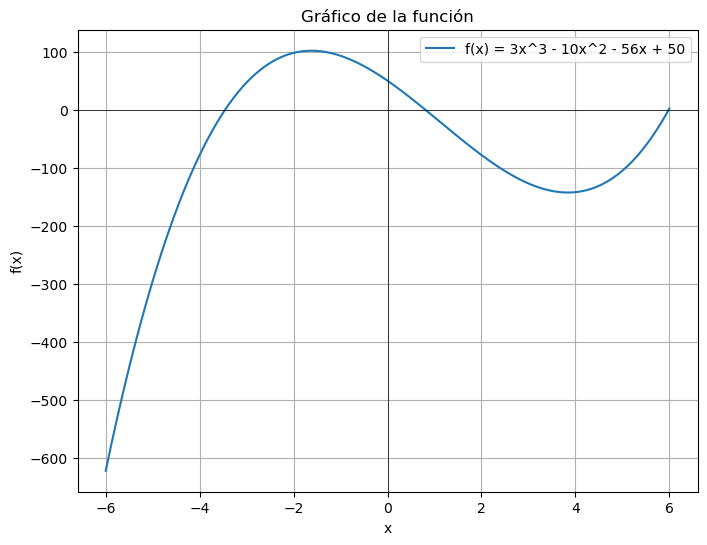

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

x = sp.symbols('x')
f = 3*x**3 - 10*x**2 - 56*x + 50
f_prime = sp.diff(f, x)
f_double_prime = sp.diff(f_prime, x)

f_lambdified = sp.lambdify(x, f, 'numpy')
X = np.linspace(-6, 6, 400)
Y = f_lambdified(X)

plt.figure(figsize=(8, 6))
plt.plot(X, Y, label='f(x) = 3x^3 - 10x^2 - 56x + 50')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.title('Gráfico de la función')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

## 2. Derivadas analíticas de f(x)
Para:
$$ f(x) = 3x^3 - 10x^2 - 56x + 50 $$
Las derivadas son:
$$ f'(x) = 9x^2 - 20x - 56 $$
$$ f''(x) = 18x - 20 $$
Usamos SymPy para confirmarlas y luego evaluarlas en cada iteración del método.


In [2]:
def newton_raphson_1d(f, f_prime, f_double_prime, x0, alpha=1.0, tol=1e-3, max_iter=100):
    """
    Método de Newton-Raphson para optimizar una función 1D (buscar mínimos/máximos locales).
    Parámetros:
      - f: expresión de sympy de la función f(x) (no se usa directamente, se mantiene por contrato)
      - f_prime: primera derivada de f (sympy)
      - f_double_prime: segunda derivada de f (sympy)
      - x0: punto inicial (float o sympy)
      - alpha: tamaño de paso
      - tol: tolerancia sobre la magnitud del gradiente o paso
      - max_iter: máximo número de iteraciones
    Retorna:
      - (x_opt, puntos): el punto encontrado y la secuencia de iteraciones
    """
    xi = float(x0)
    puntos = [xi]

    for i in range(1, max_iter + 1):
        grad_f_x = float(f_prime.subs(x, xi))
        hess_f_xx = float(f_double_prime.subs(x, xi))
        if abs(grad_f_x) < tol:
            break
        if hess_f_xx == 0:
            print("Hessiano nulo; se detiene la iteración.")
            break
        delta = grad_f_x / hess_f_xx
        xi = xi - alpha * delta
        puntos.append(xi)
        print(f"Iteración {i}: x = {xi}")
        if abs(delta) < tol:
            break
    return xi, puntos

In [3]:
# Experimentos con distintos valores iniciales x0 en [-6, 6]
x0_values = np.linspace(-6, 6, 13)
resultados = []
for x0 in x0_values:
    x_star, puntos = newton_raphson_1d(f, f_prime, f_double_prime, x0)
    s2 = float(f_double_prime.subs(x, x_star))
    tipo = "mínimo" if s2 > 0 else ("máximo" if s2 < 0 else "indeterminado")
    fx_star = float(f.subs(x, x_star))
    iters = len(puntos) - 1
    resultados.append((x0, x_star, iters, tipo, fx_star))
    print(f"x0={x0:.2f} -> x*={x_star:.6f} ({tipo}), iteraciones={iters}, f(x*)={fx_star:.6f}")

Iteración 1: x = -2.96875
Iteración 2: x = -1.8426728723404255
Iteración 3: x = -1.6280245255855108
Iteración 4: x = -1.6196142241481963
x0=-6.00 -> x*=-1.619614 (máximo), iteraciones=4, f(x*)=101.721420
Iteración 1: x = -2.5545454545454547
Iteración 2: x = -1.738832385580801
Iteración 3: x = -1.622095367522007
Iteración 4: x = -1.6196024107161833
x0=-5.00 -> x*=-1.619602 (máximo), iteraciones=4, f(x*)=101.721420
Iteración 1: x = -2.1739130434782608
Iteración 2: x = -1.6663682864450127
Iteración 3: x = -1.6199950027010181
Iteración 4: x = -1.6196013011464858
x0=-4.00 -> x*=-1.619601 (máximo), iteraciones=4, f(x*)=101.721420
Iteración 1: x = -1.8513513513513513
Iteración 2: x = -1.6286660456706072
Iteración 3: x = -1.6196162685302693
x0=-3.00 -> x*=-1.619616 (máximo), iteraciones=3, f(x*)=101.721420
Iteración 1: x = -1.6428571428571428
Iteración 2: x = -1.6196994648003293
Iteración 3: x = -1.6196012745307966
x0=-2.00 -> x*=-1.619601 (máximo), iteraciones=3, f(x*)=101.721420
Iteración 1:

## 3. Experimentos con valores iniciales $x_0$ en [-6,6]
La elección de $x_0$ afecta la cuenca de atracción y el número de iteraciones. Newton-Raphson puede converger a diferentes críticos dependiendo de la región inicial. Exploramos una malla uniforme para observar estabilidad y clasificación de los puntos encontrados.


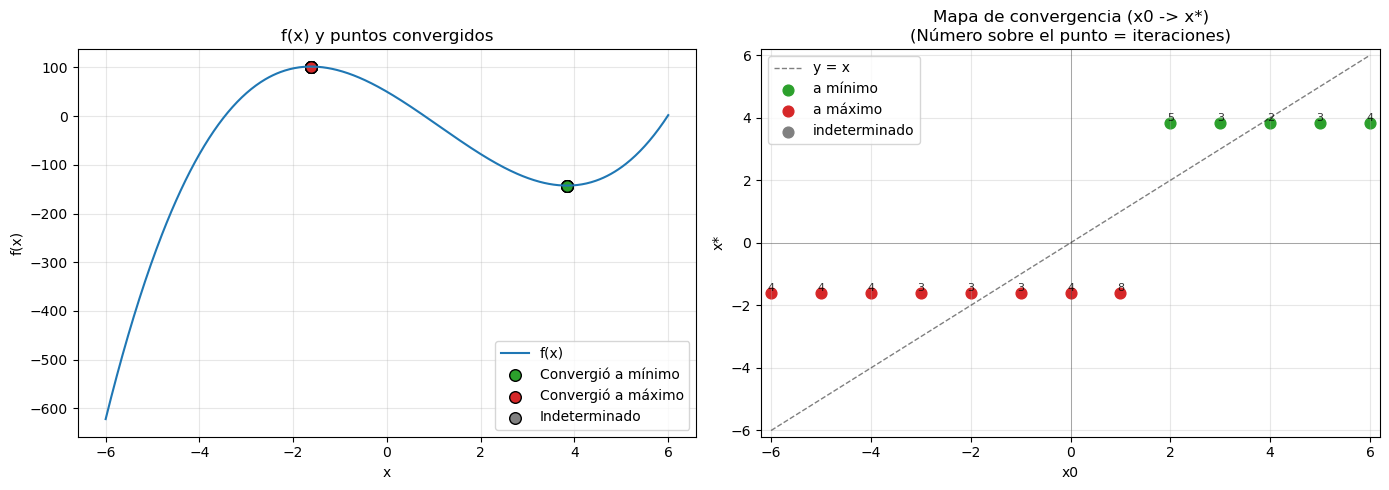

In [4]:
# Visualización de resultados de experimentos NR 1D
x0s = np.array([r[0] for r in resultados], dtype=float)
xstars = np.array([r[1] for r in resultados], dtype=float)
iters = np.array([r[2] for r in resultados], dtype=int)
tipos = [r[3] for r in resultados]
fxstars = np.array([r[4] for r in resultados], dtype=float)

mask_min = np.array([t == "mínimo" for t in tipos])
mask_max = np.array([t == "máximo" for t in tipos])
mask_ind = np.array([t == "indeterminado" for t in tipos])

X_plot = np.linspace(-6, 6, 600)
Y_plot = f_lambdified(X_plot)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
ax = axes[0]
ax.plot(X_plot, Y_plot, label='f(x)', color='tab:blue')
ax.scatter(xstars[mask_min], fxstars[mask_min], c='tab:green', edgecolors='k', s=70, label='Convergió a mínimo')
ax.scatter(xstars[mask_max], fxstars[mask_max], c='tab:red', edgecolors='k', s=70, label='Convergió a máximo')
ax.scatter(xstars[mask_ind], fxstars[mask_ind], c='gray', edgecolors='k', s=70, label='Indeterminado')
ax.set_title('f(x) y puntos convergidos')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.grid(True, alpha=0.3)
ax.legend()
ax2 = axes[1]
ax2.axhline(0, color='k', linewidth=0.4, alpha=0.5)
ax2.axvline(0, color='k', linewidth=0.4, alpha=0.5)
ax2.plot([-6, 6], [-6, 6], 'k--', linewidth=1, alpha=0.5, label='y = x')
ax2.scatter(x0s[mask_min], xstars[mask_min], c='tab:green', s=60, label='a mínimo')
ax2.scatter(x0s[mask_max], xstars[mask_max], c='tab:red', s=60, label='a máximo')
ax2.scatter(x0s[mask_ind], xstars[mask_ind], c='gray', s=60, label='indeterminado')
for x0, xs, it in zip(x0s, xstars, iters):
    ax2.text(x0, xs, str(it), fontsize=8, ha='center', va='bottom', alpha=0.8)
ax2.set_xlim([-6.2, 6.2])
ax2.set_ylim([-6.2, 6.2])
ax2.set_xlabel('x0')
ax2.set_ylabel('x*')
ax2.set_title('Mapa de convergencia (x0 -> x*)\n(Número sobre el punto = iteraciones)')
ax2.grid(True, alpha=0.3)
ax2.legend(loc='best')
plt.tight_layout()
plt.show()

Iteración 1: x = -1.8513513513513513
Iteración 2: x = -1.6286660456706072
Iteración 3: x = -1.6196162685302693
Iteración 1: x = -2.081081081081081
Iteración 2: x = -1.7385827972845846
Iteración 3: x = -1.6453846827594298
Iteración 4: x = -1.6248544227846036
Iteración 5: x = -1.6206559372623708
Iteración 6: x = -1.6198123685362884
Iteración 7: x = -1.619643498446553
Iteración 1: x = -2.310810810810811
Iteración 2: x = -1.937971253394685
Iteración 3: x = -1.7569220469018603
Iteración 4: x = -1.6765020486333195
Iteración 5: x = -1.642710020801991
Iteración 6: x = -1.6289029472438414
Iteración 7: x = -1.6233314156266052
Iteración 8: x = -1.621094856433027
Iteración 9: x = -1.620198951176549
Iteración 10: x = -1.6198403833659472
Iteración 1: x = -2.6554054054054053
Iteración 2: x = -2.3873915848278013
Iteración 3: x = -2.182329673817119
Iteración 4: x = -2.0279336043985325
Iteración 5: x = -1.9134013906328349
Iteración 6: x = -1.8295423018322268
Iteración 7: x = -1.7688082299576988
Iteració

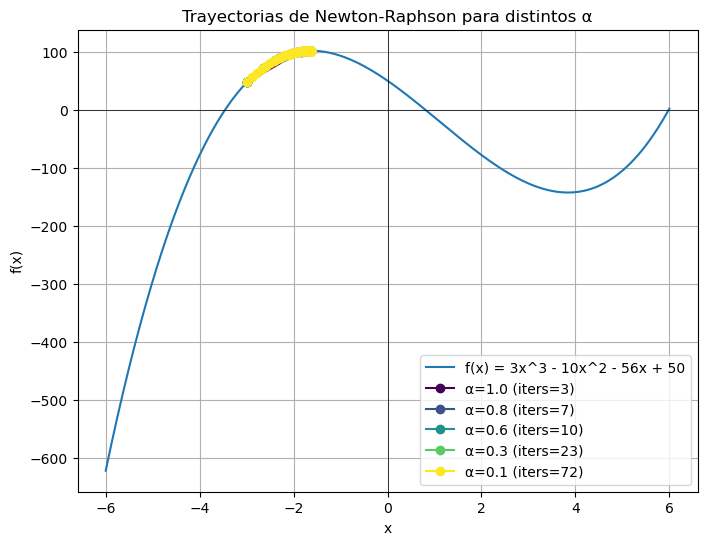

In [5]:
# Trayectorias con diferentes valores de alpha
x0 = -3.0
alpha_values = [1.0, 0.8, 0.6, 0.3, 0.1]
X_plot = np.linspace(-6, 6, 600)
Y_plot = f_lambdified(X_plot)
plt.figure(figsize=(8, 6))
plt.plot(X_plot, Y_plot, label='f(x) = 3x^3 - 10x^2 - 56x + 50', color='tab:blue')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
colors = plt.cm.viridis(np.linspace(0, 1, len(alpha_values)))
for a, c in zip(alpha_values, colors):
    x_star, pts = newton_raphson_1d(f, f_prime, f_double_prime, x0, alpha=a)
    pts = np.array(pts, dtype=float)
    iters = len(pts) - 1
    plt.plot(pts, f_lambdified(pts), '-o', color=c, label=f'α={a} (iters={iters})')
plt.title('Trayectorias de Newton-Raphson para distintos α')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

## 4. Efecto del factor de convergencia $\alpha$
El valor de $\alpha$ actúa como un factor de amortiguación. $\alpha=1$ es el paso clásico; valores menores pueden mejorar estabilidad cuando la aproximación de segundo orden produce saltos excesivos. Comparamos varias trayectorias incluyendo $\alpha=0.6$.


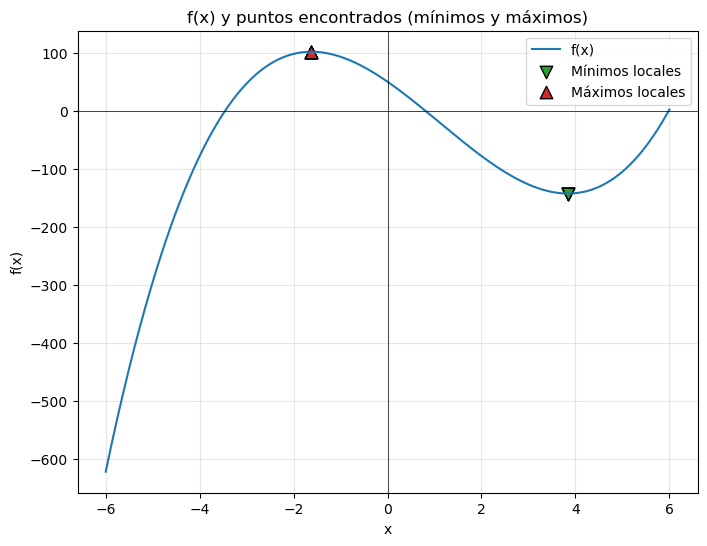

In [6]:
# Graficar puntos mínimos y máximos
puntos = []
try:
    _ = resultados
    tmp = {}
    for r in resultados:
        xs = float(r[1])
        key = round(xs, 6)
        s2 = float(f_double_prime.subs(x, key))
        tipo = "mínimo" if s2 > 0 else ("máximo" if s2 < 0 else "indeterminado")
        tmp[key] = (key, float(f.subs(x, key)), tipo)
    puntos = list(tmp.values())
except NameError:
    crit = sp.solve(sp.Eq(f_prime, 0), x)
    for xi in crit:
        xi_f = float(xi)
        s2 = float(f_double_prime.subs(x, xi_f))
        tipo = "mínimo" if s2 > 0 else ("máximo" if s2 < 0 else "indeterminado")
        puntos.append((xi_f, float(f.subs(x, xi_f)), tipo))
X_plot = np.linspace(-6, 6, 600)
Y_plot = f_lambdified(X_plot)
xs_min = [px for px, py, tp in puntos if tp == "mínimo"]
ys_min = [py for px, py, tp in puntos if tp == "mínimo"]
xs_max = [px for px, py, tp in puntos if tp == "máximo"]
ys_max = [py for px, py, tp in puntos if tp == "máximo"]
xs_ind = [px for px, py, tp in puntos if tp == "indeterminado"]
ys_ind = [py for px, py, tp in puntos if tp == "indeterminado"]
plt.figure(figsize=(8, 6))
plt.plot(X_plot, Y_plot, label='f(x)', color='tab:blue')
if xs_min:
    plt.scatter(xs_min, ys_min, c='tab:green', marker='v', s=80, edgecolors='k', label='Mínimos locales')
if xs_max:
    plt.scatter(xs_max, ys_max, c='tab:red', marker='^', s=80, edgecolors='k', label='Máximos locales')
if xs_ind:
    plt.scatter(xs_ind, ys_ind, c='gray', marker='o', s=70, edgecolors='k', label='Indeterminados')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title('f(x) y puntos encontrados (mínimos y máximos)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

## 5. Gráfica de la función y clasificación de puntos críticos
Una vez encontrados los puntos donde $f'(x)=0$, clasificamos usando $f''(x)$: signo positivo indica curvatura hacia arriba (mínimo), negativo hacia abajo (máximo). Se visualiza la función y los puntos marcados para verificar coherencia geométrica.


In [7]:
# Análisis de convergencia textual
import contextlib, io
from collections import defaultdict, Counter
alpha_eval = 1.0
x0_values = np.linspace(-6, 6, 61)
resultados_x0 = []
for x0 in x0_values:
    buf = io.StringIO()
    with contextlib.redirect_stdout(buf):
        x_star, pts = newton_raphson_1d(f, f_prime, f_double_prime, float(x0), alpha=alpha_eval)
    iters = len(pts) - 1
    s2 = float(f_double_prime.subs(x, x_star))
    tipo = "mínimo" if s2 > 0 else ("máximo" if s2 < 0 else "indeterminado")
    resultados_x0.append((float(x0), float(x_star), int(iters), tipo))
tipos = [t for (_, _, _, t) in resultados_x0]
count_by_type = Counter(tipos)
print("Resumen por tipo de convergencia (x0 en [-6, 6]):")
for k in ["mínimo", "máximo", "indeterminado"]:
    print(f"  {k}: {count_by_type.get(k, 0)}")
round_decimals = 6
basins = defaultdict(lambda: {"x0s": [], "iters": [], "tipos": []})
for x0, xs, it, tp in resultados_x0:
    key = round(xs, round_decimals)
    basins[key]["x0s"].append(x0)
    basins[key]["iters"].append(it)
    basins[key]["tipos"].append(tp)
print("\nBasins de atracción (x* redondeado):")
for xs_key in sorted(basins.keys()):
    info = basins[xs_key]
    x0s_sorted = sorted(info["x0s"])
    rango = (x0s_sorted[0], x0s_sorted[-1]) if x0s_sorted else (None, None)
    s2 = float(f_double_prime.subs(x, xs_key))
    tipo_basin = "mínimo" if s2 > 0 else ("máximo" if s2 < 0 else "indeterminado")
    print(f"  x* ≈ {xs_key:.6f} -> tipo: {tipo_basin}, ocurrencias: {len(info['x0s'])}, iters (min/mean/max): {np.min(info['iters'])}/{np.mean(info['iters']):.2f}/{np.max(info['iters'])}, rango x0: [{rango[0]:.1f}, {rango[1]:.1f}]")
all_iters = np.array([it for (_, _, it, _) in resultados_x0], dtype=int)
print("\nEstadísticas globales de iteraciones:")
print(f"  min: {all_iters.min()}  mean: {all_iters.mean():.2f}  median: {np.median(all_iters):.2f}  max: {all_iters.max()}")

Resumen por tipo de convergencia (x0 en [-6, 6]):
  mínimo: 25
  máximo: 36
  indeterminado: 0

Basins de atracción (x* redondeado):
  x* ≈ -1.619618 -> tipo: máximo, ocurrencias: 1, iters (min/mean/max): 2/2.00/2, rango x0: [-1.4, -1.4]
  x* ≈ -1.619616 -> tipo: máximo, ocurrencias: 1, iters (min/mean/max): 3/3.00/3, rango x0: [-3.0, -3.0]
  x* ≈ -1.619614 -> tipo: máximo, ocurrencias: 1, iters (min/mean/max): 4/4.00/4, rango x0: [-6.0, -6.0]
  x* ≈ -1.619610 -> tipo: máximo, ocurrencias: 1, iters (min/mean/max): 4/4.00/4, rango x0: [-5.8, -5.8]
  x* ≈ -1.619607 -> tipo: máximo, ocurrencias: 4, iters (min/mean/max): 2/3.25/4, rango x0: [-5.6, 0.0]
  x* ≈ -1.619606 -> tipo: máximo, ocurrencias: 1, iters (min/mean/max): 3/3.00/3, rango x0: [-0.8, -0.8]
  x* ≈ -1.619605 -> tipo: máximo, ocurrencias: 1, iters (min/mean/max): 4/4.00/4, rango x0: [-5.4, -5.4]
  x* ≈ -1.619604 -> tipo: máximo, ocurrencias: 1, iters (min/mean/max): 6/6.00/6, rango x0: [0.8, 0.8]
  x* ≈ -1.619603 -> tipo: máxi

## 6. Análisis del comportamiento de la convergencia
Se recorre una malla fina de valores iniciales y se analiza: (a) a qué punto crítico converge cada $x_0$, (b) iteraciones requeridas, (c) cuencas de atracción agrupando $x^*$ redondeados. Esto permite estudiar estabilidad y eficiencia del método para la función dada.
